In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.api.types import is_object_dtype
pd.set_option('display.max_columns', None)
%matplotlib inline

In [5]:
df = pd.read_csv("../data/testlizenz-tuebingen-dataliteracy4students_rt_stuttgart/testlizenz-tuebingen-dataliteracy4students_1706088512814.csv", sep=";", encoding="unicode_escape")

In [6]:
df["objekttyp"].unique()

array(['Wohnung'], dtype=object)

In [7]:
df = df[df["objekttyp"]=="Wohnung"]

In [8]:
df['startyear'] = df['startdate'].str[:4]
df['endyear'] = df['enddate'].str[:4]
df_copy = df.copy()

In [9]:
for column in df.columns:
    if is_object_dtype(df[column]):
        if df[column].str.contains(',').any():
            df[column] = df[column].str.replace(',', '.').astype(float)
            df_copy[column] = df_copy[column].str.replace(',', '.').astype(float)
df_copy

,angebot_id,anz_parken,anz_zimmer,aus_alarmanlage_janein,aus_bad_dusche_janein,aus_bad_gaestewc_janein,aus_bad_mit_fenster_janein,aus_bad_wanne_janein,aus_heiz_alt_erdw_janein,aus_heiz_alt_solar_janein,aus_heiz_alt_pellet_janein,aus_heiz_alt_pumpe_janein,aus_heiz_blockkw_janein,aus_heiz_befeuerung,aus_heiz_fernwaerme_janein,aus_heiz_fussboden_janein,aus_heiz_keine_janein,aus_heiz_system,aus_kamin_janein,aus_kueche_einbau_janein,aus_kueche_offen_janein,aus_kueche_pantry_janein,aus_lift_janein,aus_moebliert_janein,aus_parken_carport_janein,aus_parken_janein,aus_parken_ladestation_janein,aus_parken_stellplaetze_janein,aus_pool_janein,aus_sauna_janein,baujahr,flaeche,etage,etagen,fl_wohnen,kosten,kosten_je_flaeche,kosten_miete_gesamt_janein,kstn_betriebskosten,kstn_betriebskosten_pqm,kstn_heizung,laufzeitw_alle,laufzeitw_geschl,nachfrageart,nutzungsart,oadr_bl,oadr_gkz,oadr_kkz,kstn_nebenkosten,kstn_miete_kalt,kstn_miete_gesamt,kstn_miete_gesamt_pqm,kstn_miete_kalt_pqm,kstn_kaufpreis,kstn_kaufpreis_pqm,kstn_heizung_pqm,oadr_kreis,oadr_ort,oadr_plz,oadr_u1,oadr_u2,objektart,objekttyp,objekttyp_fein,objekttyp_grob,oeig_altbau_janein,zust_saniert_janein,zust_neuwertig_janein,zust_projektiert_janein,zust_modernisierungsjahr,zust_gepflegt_janein,startdate,segment,oeig_wbs_janein,oeig_vermietet_janein,oeig_reihenendhaus_janein3,oeig_neubau_janein,oeig_loggia_janein,oeig_keller_janein,oeig_freistehend_janein,oeig_denkmal_janein,oeig_dachgeschoss_janein,enddate,aus_balkon_terrasse_janein,aus_wintergarten_janein,aus_garten_eigen_janein,startyear,endyear
0,3600813965,NaN,2.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,NaN,58.0,2.0,NaN,58.0,950.0,16.38,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,NaN,950.0,NaN,NaN,16.38,NaN,NaN,NaN,Stuttgart,Stuttgart,70374,Bad Cannstatt,NaN,Einheit,Wohnung,2-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,0,0,2024-01-07,0,0,0,2023,2024
1,3600228249,NaN,1.0,0,1,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,NaN,30.0,0.5,NaN,30.0,550.0,18.33,0,NaN,NaN,50.0,0.1,NaN,miete,Wohn,8,8111000,8111,50.0,550.0,600.0,20.00,18.33,NaN,NaN,1.67,Stuttgart,Stuttgart,70376,Bad Cannstatt,NaN,Einheit,Wohnung,1-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,0,0,0,-1,NaN,0,0,0,2023,NaN
2,3600178856,1.0,3.0,0,0,0,0,1,0,0,0,0,0,NaN,0,0,0,NaN,0,1,0,0,0,0,0,1,0,0,0,0,NaN,75.0,0.5,NaN,75.0,960.0,12.80,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,290.0,960.0,1250.0,16.67,12.80,NaN,NaN,NaN,Stuttgart,Stuttgart,70599,Birkach,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,1,0,0,2023.0,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,0,-1,NaN,1,0,-1,2023,NaN
3,3600126466,1.0,3.0,0,1,1,1,1,0,0,0,0,0,NaN,1,1,0,Zentral,0,1,1,0,1,0,0,1,0,0,0,0,2016.0,90.0,4.0,6.0,90.0,1800.0,20.00,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,270.0,1800.0,2070.0,23.00,20.00,NaN,NaN,NaN,Stuttgart,Stuttgart,70197,West,Rotebühl,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,1,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,1,0,-1,0,NaN,1,0,0,2023,NaN
4,3600106670,NaN,3.0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,66.0,NaN,NaN,66.0,1000.0,15.15,0,NaN,NaN,NaN,0.1,NaN,miete,Wohn,8,8111000,8111,200.0,1000.0,1200.0,18.18,15.15,NaN,NaN,NaN,Stuttgart,Stuttgart,70376,Münster,Münster,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,NaN,0,2023-12-31,WHG_M,0,0,0,0,0,0,0,0,0,NaN,0,0,0,2023,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106715,622154587,1.0,3.5,0,1,0,1,1,0,0,0,0,0,Gas,0,0,0,Zentral,0,1,0,0,1,0,0,1,0,0,0,0,1998.0,86.0,0.0,NaN,86.0,790.0,9.19,0,NaN,NaN,NaN,48.8,48.8,miete,Wohn,8,8111000,8111,210.0,790.0,1000.0,11.63,9.19,NaN,NaN,NaN,Stuttgart,Stuttgart,70195,Botnang,NaN,Einheit,Wohnung,3-Z-Whg,Wohnung,0,0,0,0,NaN,0,2011-02-11,WHG_M,0,0,0,0,0,0,0,

In [10]:
df_copy["oadr_ort"].count()


106720

In [11]:
df_copy["startyear"] = df_copy["startyear"].astype(int)

## Look at individual rooms

In [12]:
df_flats = df_copy.groupby(["oadr_ort", "startyear", "objekttyp_fein"]).agg(mean_pqm=("kstn_miete_kalt_pqm", "mean"), median_pqm = ("kstn_miete_kalt_pqm", "median")).reset_index()

In [13]:
df_flats

,oadr_ort,startyear,objekttyp_fein,mean_pqm,median_pqm
0,Reutlingen,2011,1-Z-Whg,9.645000,9.645
1,Reutlingen,2011,2-Z-Whg,7.705000,7.590
2,Reutlingen,2011,3-Z-Whg,7.198571,7.170
3,Reutlingen,2011,4-Z-Whg,6.677143,6.740
4,Reutlingen,2012,1-Z-Whg,9.052300,8.930
...,...,...,...,...,...
220,Tübingen,2023,2-Z-Whg,13.830380,13.475
221,Tübingen,2023,3-Z-Whg,13.374254,13.080
222,Tübingen,2023,4+-Z-Whg,12.784231,12.845
223,Tübingen,2023,4-Z-Whg,13.195366,13.490


In [14]:
df_flats = df_flats[df_flats["objekttyp_fein"] != "kA-Z-Whg"]

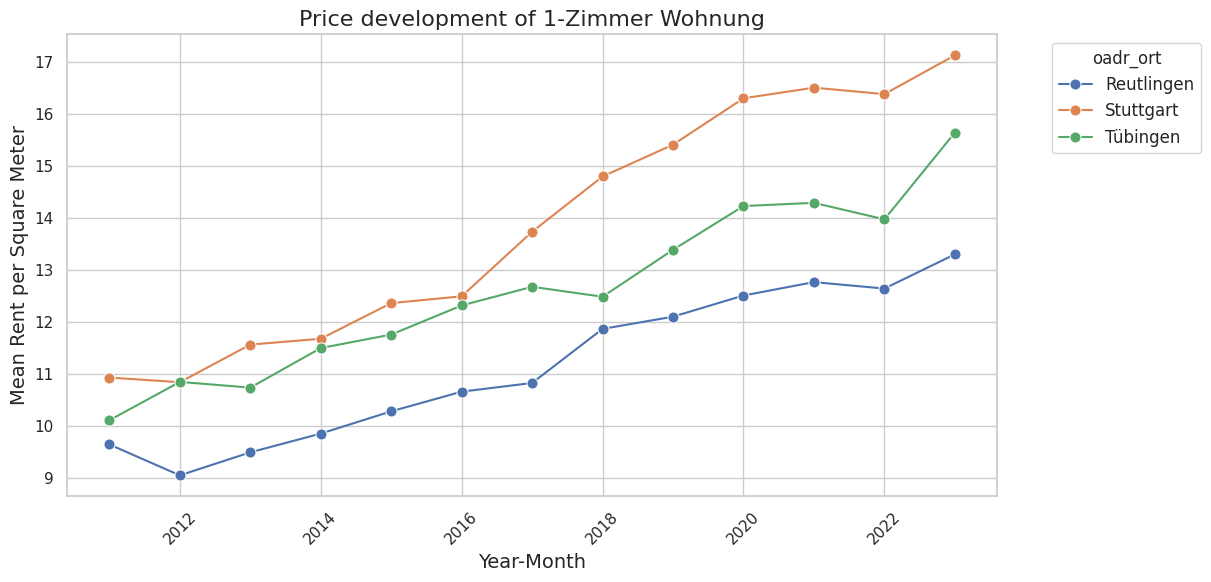

In [15]:
df_flats_1 = df_flats[df_flats["objekttyp_fein"] == "1-Z-Whg"]
plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_flats_1, x="startyear", y="mean_pqm", hue="oadr_ort",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Price development of 1-Zimmer Wohnung', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


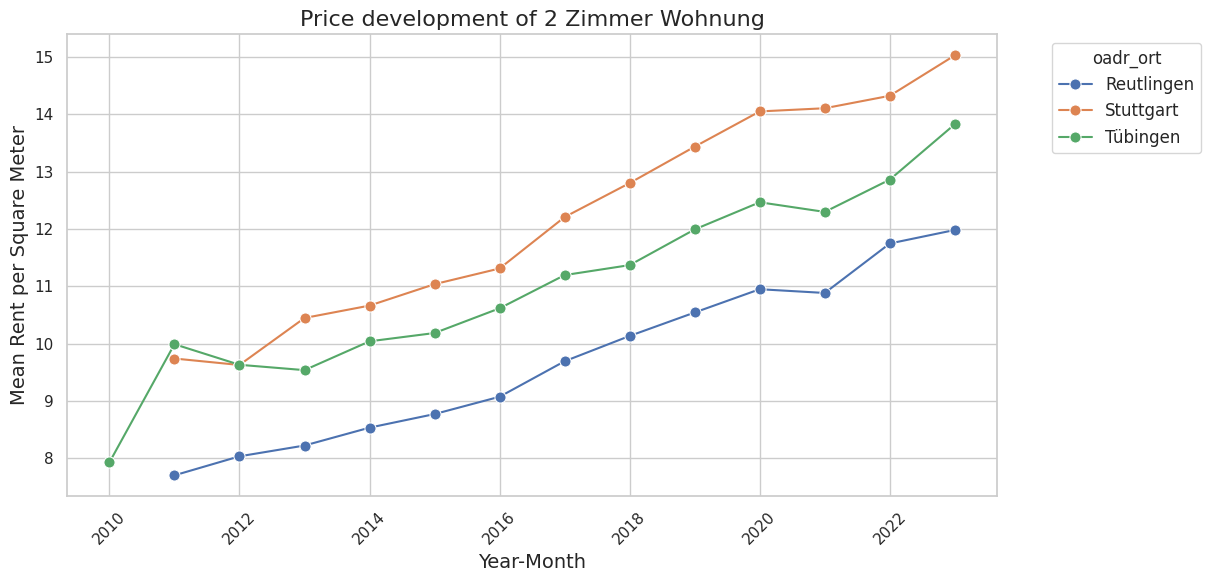

In [16]:
df_flats_2 = df_flats[df_flats["objekttyp_fein"] == "2-Z-Whg"]
plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_flats_2, x="startyear", y="mean_pqm", hue="oadr_ort",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Price development of 2 Zimmer Wohnung', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


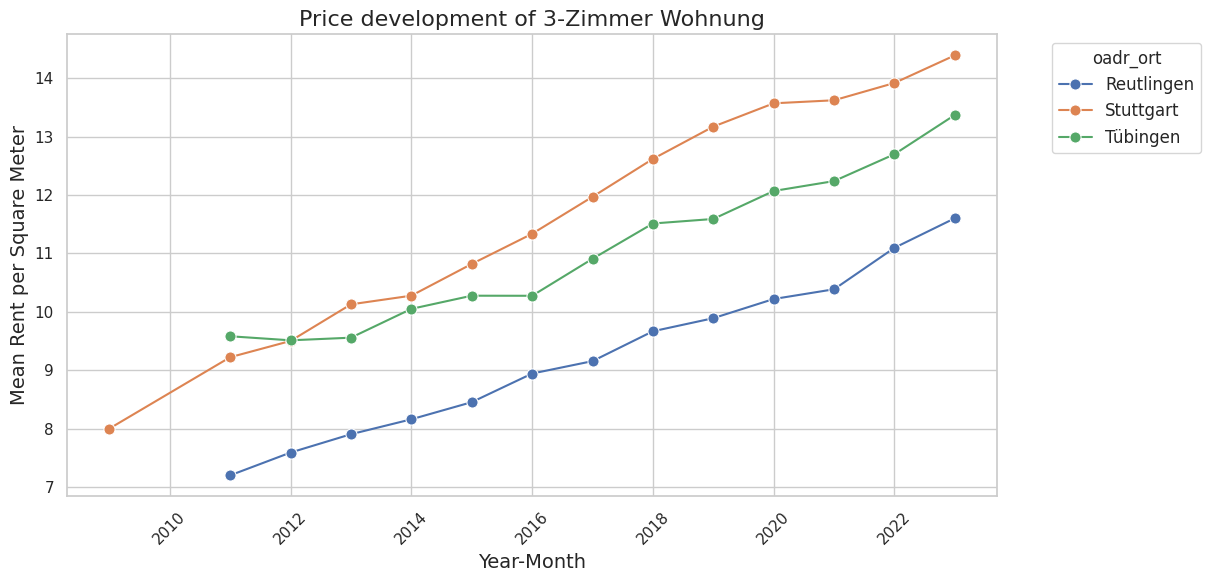

In [17]:
df_flats_3 = df_flats[df_flats["objekttyp_fein"] == "3-Z-Whg"]
plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_flats_3, x="startyear", y="mean_pqm", hue="oadr_ort",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Price development of 3-Zimmer Wohnung', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


In [18]:
df_flats.shape

(196, 5)

In [19]:
df_flats_tue = df_flats[df_flats["oadr_ort"] == "Tübingen"]
df_flats_tue = df_flats_tue[df_flats_tue["objekttyp_fein"] != "kA-Z-Whg"]

In [20]:
df_flats_tue.shape

(66, 5)

In [21]:
df_flats_tue

,oadr_ort,startyear,objekttyp_fein,mean_pqm,median_pqm
151,Tübingen,2010,2-Z-Whg,7.930000,7.930
152,Tübingen,2010,4-Z-Whg,7.240000,7.240
153,Tübingen,2011,1-Z-Whg,10.110000,10.300
154,Tübingen,2011,2-Z-Whg,9.992500,9.735
155,Tübingen,2011,3-Z-Whg,9.581538,9.130
...,...,...,...,...,...
219,Tübingen,2023,1-Z-Whg,15.634807,15.000
220,Tübingen,2023,2-Z-Whg,13.830380,13.475
221,Tübingen,2023,3-Z-Whg,13.374254,13.080
222,Tübingen,2023,4+-Z-Whg,12.784231,12.845


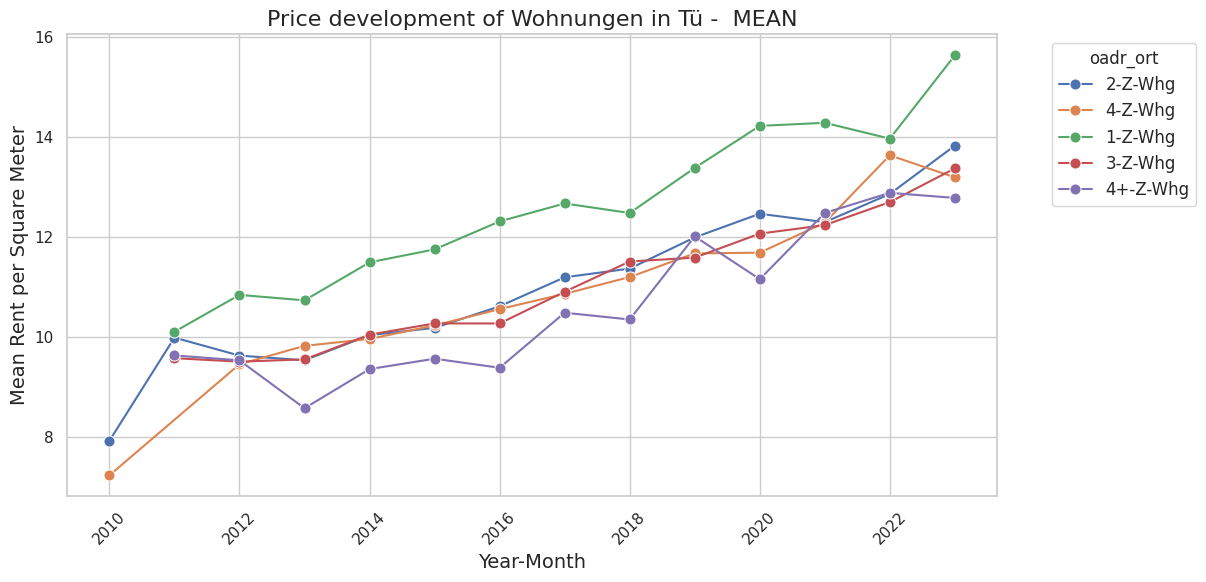

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_flats_tue, x="startyear", y="mean_pqm", hue="objekttyp_fein",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Price development of Wohnungen in Tü -  MEAN', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


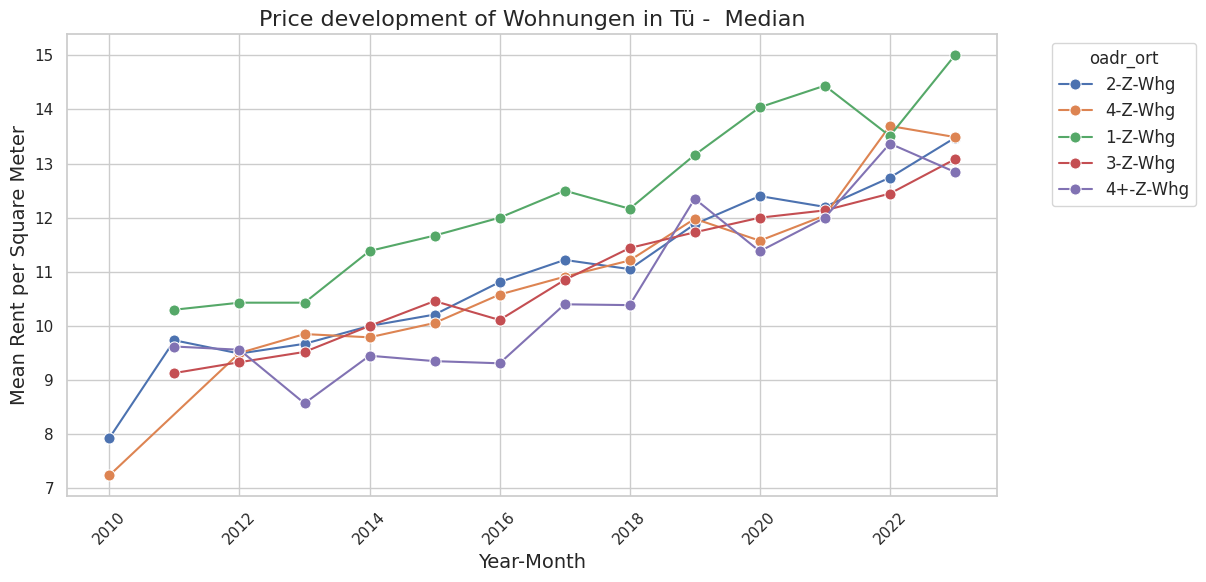

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Set the style
sns.set(style="whitegrid")

# Create a color palette

# Plotting
sns.lineplot(data=df_flats_tue, x="startyear", y="median_pqm", hue="objekttyp_fein",  marker="o", markersize=8,)

# Enhancing the plot
plt.title('Price development of Wohnungen in Tü -  Median', fontsize=16)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Mean Rent per Square Meter', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='oadr_ort', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=12)

# Show the plot
plt.show()


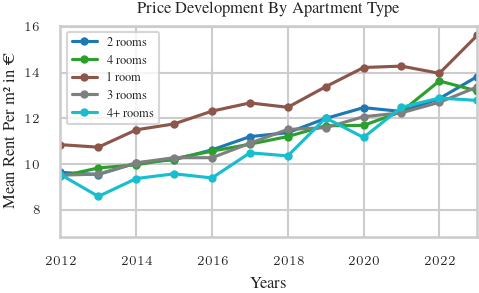

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tueplots.constants.color import palettes, rgb
from tueplots import bundles, cycler
from tueplots.constants.color import palettes

plt.rcParams.update({"figure.dpi": 150})

plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=True))
plt.rcParams.update(
    cycler.cycler(color=palettes.tue_plot)  # marker=marker_constants.o_sized,
)
unique_objekttyp_fein = df_flats_tue['objekttyp_fein'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_objekttyp_fein)))  # Generating a color map

plt.figure()

for i, typ in enumerate(unique_objekttyp_fein):
    # Filter data for each apartment type
    data = df_flats_tue[df_flats_tue['objekttyp_fein'] == typ]
    plt.plot(data['startyear'], data['mean_pqm'], marker='.', color=colors[i], label=(str(typ[0:2]).replace("-", "")+f' room{"" if str(typ[0]) == "1" else "s"}'))#  + f" room{"s" if str(typ[0:1]) == "1"}"))

# Enhancing the plot
plt.title('Price Development By Apartment Type')
plt.xlabel('Years')
plt.ylabel('Mean Rent Per m² in €')
plt.xticks()
plt.xlim(2012,2023)
plt.legend(loc='upper left', ncol=1)

# Show the plot
plt.savefig("flats.pdf")
plt.show()
